# Sentiment Analysis

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Bidirectional,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

## Data Preparation

In [3]:
vocab_size = 10000
max_length = 200

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=vocab_size)

In [4]:
X_train = pad_sequences(X_train,maxlen=max_length,padding='post',truncating='post')
X_test = pad_sequences(X_test,maxlen=max_length,padding='post',truncating='post')

## Model Creation

### Loading the model

In [5]:
model = Sequential([
    Embedding(vocab_size,128,input_length=max_length),
    Bidirectional(LSTM(64,return_sequences=False)),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])

### Model compilation

In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

### Model Training

In [7]:
history = model.fit(X_train,y_train,
                   epochs = 10,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1
                   )

Epoch 1/10


625/625 [==============================] - 89s 136ms/step - loss: 0.4768 - accuracy: 0.7699 - val_loss: 0.3719 - val_accuracy: 0.8456
Epoch 2/10
625/625 [==============================] - 89s 142ms/step - loss: 0.2844 - accuracy: 0.8922 - val_loss: 0.3304 - val_accuracy: 0.8574
Epoch 3/10
625/625 [==============================] - 86s 137ms/step - loss: 0.1959 - accuracy: 0.9273 - val_loss: 0.3692 - val_accuracy: 0.8564
Epoch 4/10
625/625 [==============================] - 88s 141ms/step - loss: 0.1357 - accuracy: 0.9532 - val_loss: 0.4727 - val_accuracy: 0.8562
Epoch 5/10
625/625 [==============================] - 82s 131ms/step - loss: 0.1149 - accuracy: 0.9596 - val_loss: 0.5264 - val_accuracy: 0.8376
Epoch 6/10
625/625 [==============================] - 81s 130ms/step - loss: 0.0811 - accuracy: 0.9725 - val_loss: 0.5638 - val_accuracy: 0.8362
Epoch 7/10
625/625 [==============================] - 82s 130ms/step - loss: 0.0657 - accuracy: 0.9772 - val_loss: 0.6921 - val_

### Model Evaluation

In [8]:
test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(f"Test Accuract : {test_accuracy*100:.2f}%")

Test Accuract : 82.19%


## Visualization

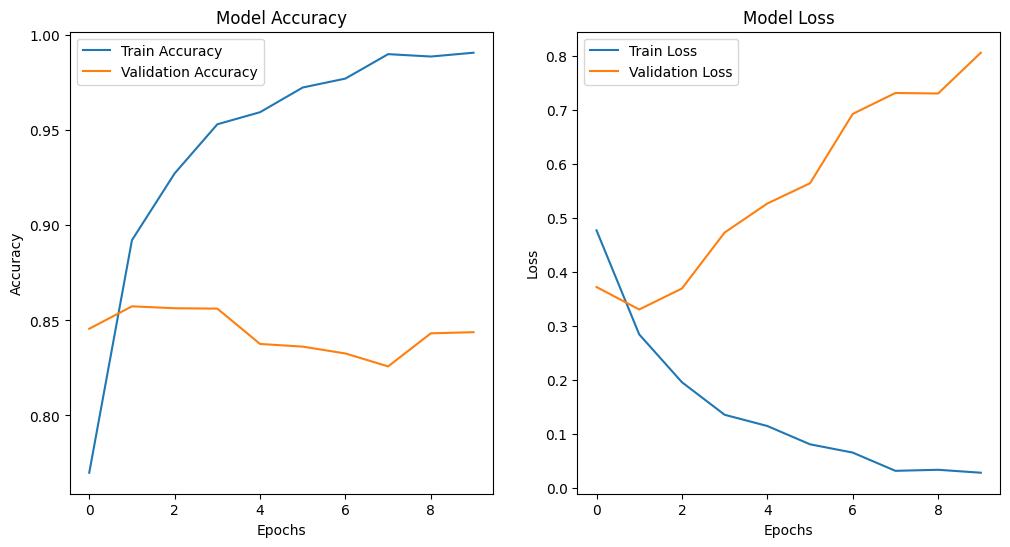

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()
